<a href="https://colab.research.google.com/github/RhoYul/Machine_Learning_Term_Project/blob/main/ML_Song_Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_high = pd.read_csv('/content/drive/MyDrive/high_popularity_spotify_data.csv')
df_high

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [4]:
df_high.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [5]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [6]:
# drop missing value

df_high = df_high.dropna()

In [7]:
df_high = df_high.drop_duplicates(subset='track_id', keep='first')

In [8]:
df_low = pd.read_csv('/content/drive/MyDrive/low_popularity_spotify_data.csv')
df_low

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,Carnatic Classics,M. S. Subbulakshmi,661293.0,0.424,indian,classical,...,5utDQUWCZCEXWHMmna8C63,3sIB6VOssssCO17VUPu80m,1IkR0OgVI1gydC4S6jnG2B,0.605,10.0,75.466,-8.009,0.9650,0.2420,Bhaja Govindam - Vishnu Sahasranamam
3141,4.0,22,0.0656,0.471,Carnatic Classics,Jayanthi Kumaresh,394400.0,0.349,indian,classical,...,4kUGwkHXKBbaLwnqTIrg0J,3sIB6VOssssCO17VUPu80m,4ZFM5yFsjEzvZ1XmP27L5r,0.358,8.0,147.193,-16.633,0.9750,0.2860,Veenai Jayanthi Kumaresh
3142,4.0,18,0.0671,0.436,Carnatic Classics,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",473440.0,0.595,indian,classical,...,6FMROVG9PB4nJYmvNLTdge,3sIB6VOssssCO17VUPu80m,5wZQXUcphAyBZfVdWmAiYX,0.870,3.0,174.308,-11.494,0.8160,0.0939,Into the Raga
3143,1.0,23,0.0813,0.489,Carnatic Classics,Ganesh & Kumaresh,298987.0,0.591,indian,classical,...,3si4Lr5oBcahJ3D7IPbO4N,3sIB6VOssssCO17VUPu80m,5Ca5l5vDzIOZdVwwWCxAds,0.689,8.0,174.760,-10.843,0.9480,0.0770,Thillanas: A Confluence Of Rhythm & Melody


In [9]:
df_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [10]:
df_low = df_low.dropna()

In [11]:
df_low = df_low.drop_duplicates(subset='track_id', keep='first')

In [12]:
df = pd.concat([df_high, df_low], ignore_index=True)
df = df.drop_duplicates(subset='track_id', keep='first')
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4.0,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4.0,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4.0,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,0.424,75.466,0.352,indian,-8.009,0.2420,0.605,M. S. Subbulakshmi,1.0,0.0634,...,0.0000,5utDQUWCZCEXWHMmna8C63,1.0,10.0,661293.0,0.9650,1IkR0OgVI1gydC4S6jnG2B,classical,audio_features,3sIB6VOssssCO17VUPu80m
4532,0.349,147.193,0.471,indian,-16.633,0.2860,0.358,Jayanthi Kumaresh,4.0,0.0656,...,0.9450,4kUGwkHXKBbaLwnqTIrg0J,1.0,8.0,394400.0,0.9750,4ZFM5yFsjEzvZ1XmP27L5r,classical,audio_features,3sIB6VOssssCO17VUPu80m
4533,0.595,174.308,0.436,indian,-11.494,0.0939,0.870,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",4.0,0.0671,...,0.8680,6FMROVG9PB4nJYmvNLTdge,1.0,3.0,473440.0,0.8160,5wZQXUcphAyBZfVdWmAiYX,classical,audio_features,3sIB6VOssssCO17VUPu80m
4534,0.591,174.760,0.489,indian,-10.843,0.0770,0.689,Ganesh & Kumaresh,1.0,0.0813,...,0.9270,3si4Lr5oBcahJ3D7IPbO4N,0.0,8.0,298987.0,0.9480,5Ca5l5vDzIOZdVwwWCxAds,classical,audio_features,3sIB6VOssssCO17VUPu80m


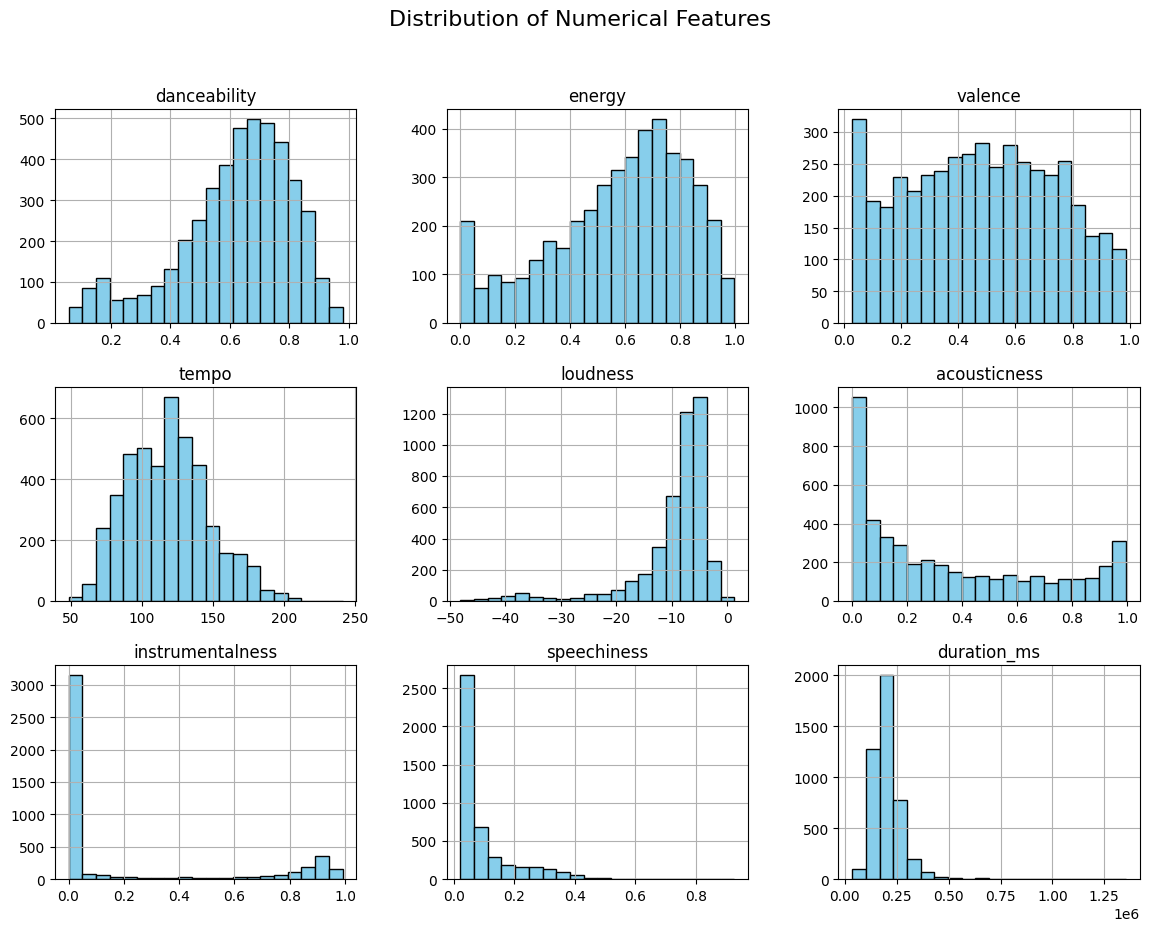

In [13]:
import matplotlib.pyplot as plt

# numerical column
numerical_features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'speechiness', 'duration_ms'
]

# visualization - matplotlib
df[numerical_features].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

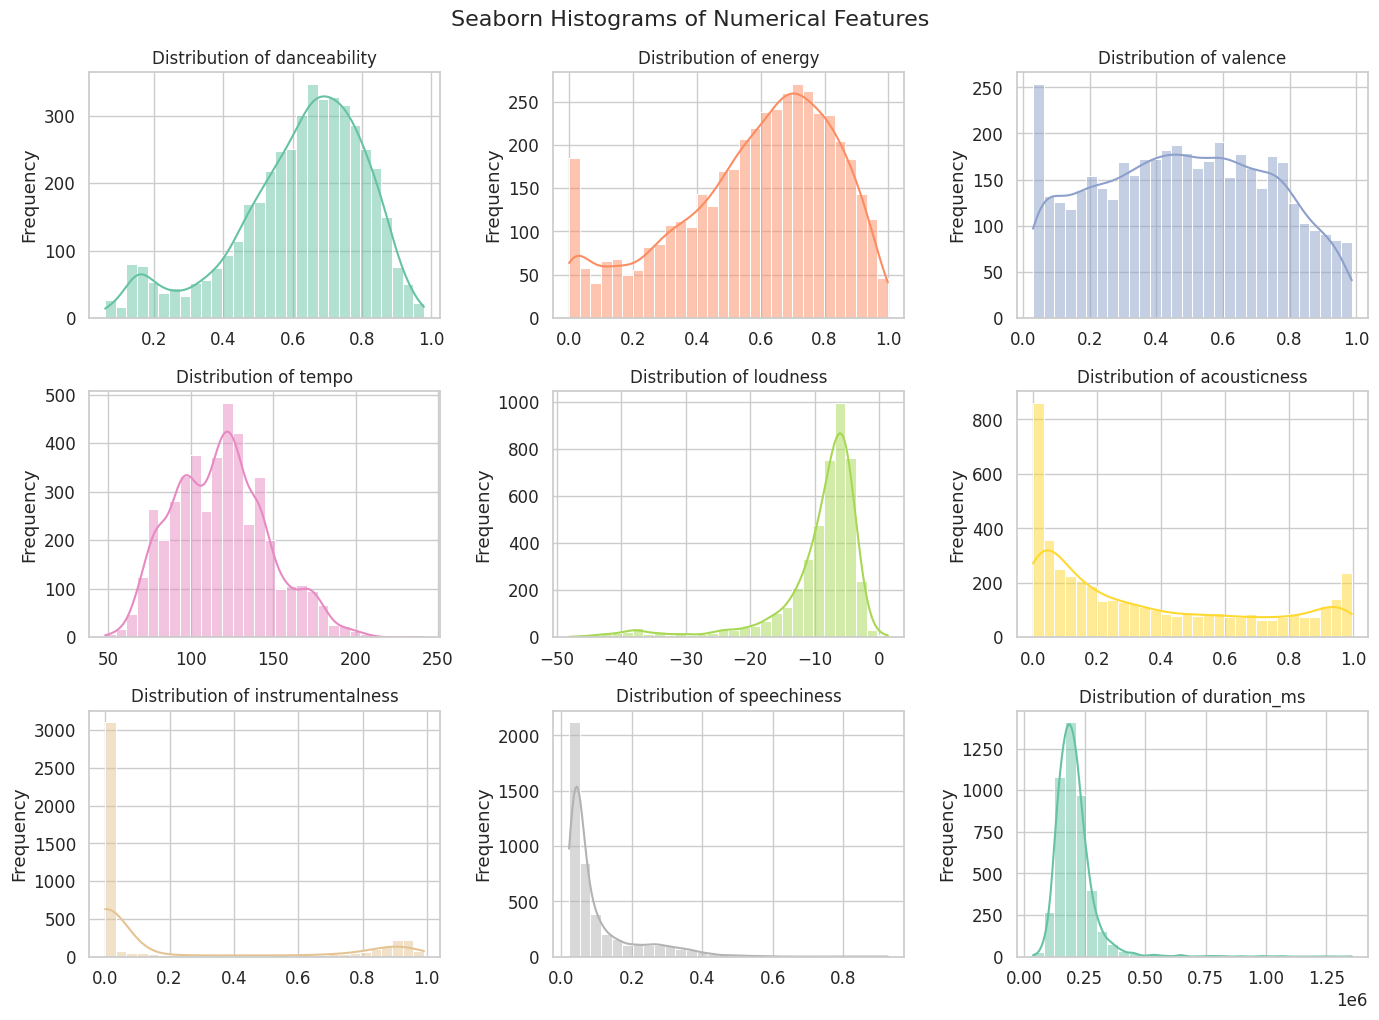

In [14]:
# visualization - seaborn
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")

    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Seaborn Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()

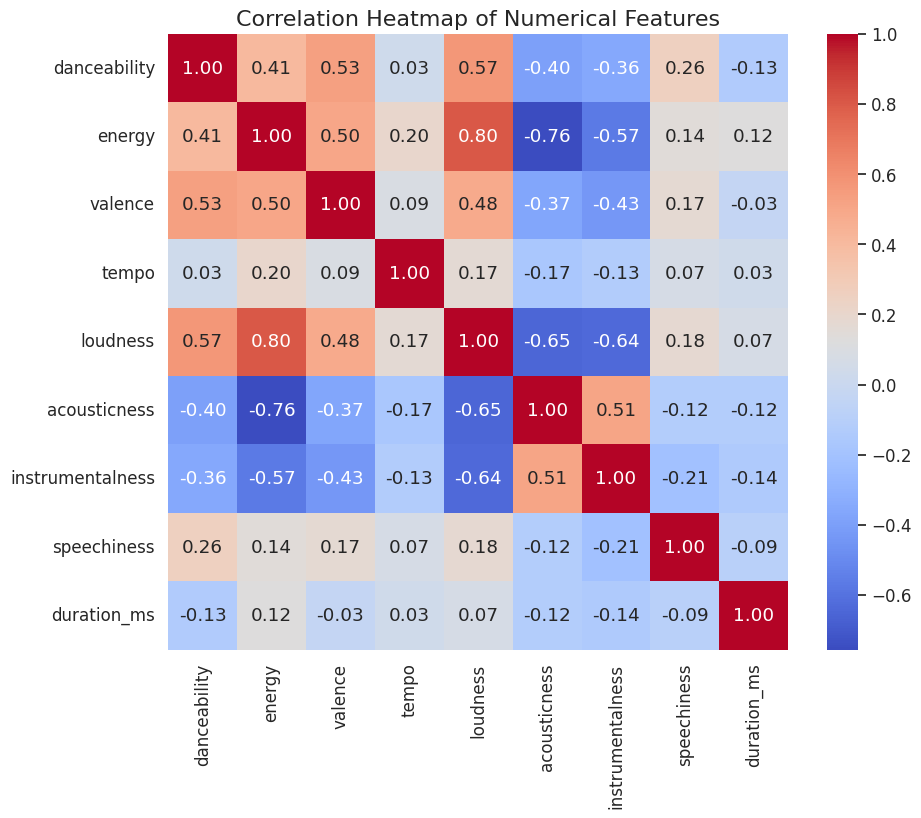

In [15]:
# Caculate Correlation

corr = df[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [16]:
# Select Feature

object_cols = df.select_dtypes(include='object').columns

cols_to_drop = [col for col in object_cols if col != 'playlist_genre']

df_select = df.drop(columns=cols_to_drop)

df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, 0 to 4535
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            4493 non-null   float64
 1   tempo             4493 non-null   float64
 2   danceability      4493 non-null   float64
 3   playlist_genre    4493 non-null   object 
 4   loudness          4493 non-null   float64
 5   liveness          4493 non-null   float64
 6   valence           4493 non-null   float64
 7   time_signature    4493 non-null   float64
 8   speechiness       4493 non-null   float64
 9   track_popularity  4493 non-null   int64  
 10  instrumentalness  4493 non-null   float64
 11  mode              4493 non-null   float64
 12  key               4493 non-null   float64
 13  duration_ms       4493 non-null   float64
 14  acousticness      4493 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 561.6+ KB


In [17]:
# Data scailing

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Select numerical columns
numeric_cols = [col for col in df_select.columns if col != 'playlist_genre']

# MinMax Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_select[numeric_cols])

df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None)
genre_encoded = encoder.fit_transform(df_select[['playlist_genre']])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['playlist_genre']))

# Concat
df_scaled = pd.concat([df_scaled.reset_index(drop=True), genre_encoded_df.reset_index(drop=True)], axis=1)

df_scaled.head()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,...,playlist_genre_pop,playlist_genre_punk,playlist_genre_r&b,playlist_genre_reggae,playlist_genre_rock,playlist_genre_soca,playlist_genre_soul,playlist_genre_turkish,playlist_genre_wellness,playlist_genre_world
0,0.593104,0.568015,0.502228,0.815842,0.105428,0.527888,0.50,0.009391,1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.507916,0.293725,0.747853,0.767368,0.100209,0.426572,0.75,0.015357,0.966292,0.061352,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.809581,0.312204,0.538094,0.888898,0.144050,0.357635,0.75,0.016462,0.921348,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.911806,0.335073,0.664167,0.890902,0.295407,0.790056,0.75,0.045851,0.786517,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.784526,0.521729,0.780459,0.882661,0.348643,0.949864,0.75,0.263065,0.977528,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
user_df = pd.read_csv('/content/drive/MyDrive/user_listening_history_v1-1.csv')
user_df

,user_id,track_id,playcount
0,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,0Hf4aIJpsN4Os2f0y0VqWl,3
1,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,14DLZ9FaTofhnXBiV38axE,2
2,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,1QPreu0BNOrUfEb8HTd2qG,5
3,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,20I8RduZC2PWMWTDCZuuAN,6
4,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,2V65y3PX4DkRhy1djlxd9p,11
...,...,...,...
295,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,64CovjRwInpOJW4PiGMprY,10
296,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,6mFkJmJqdDVQ1REhVfGgd1,10
297,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,6wkHR8cU4INbp145hngbQO,8
298,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,78lgmZwycJ3nzsdgmPPGNx,7


In [19]:
# User vector

from sklearn.neighbors import NearestNeighbors

# track structure
track_vec_dict = dict(zip(df_high['track_id'], df_scaled.values))

# user_vector
user_vectors = {}

for user_id, group in user_df.groupby('user_id'):
    valid_tracks = [t for t in group['track_id'] if t in track_vec_dict]
    if not valid_tracks:
        continue
    weights = group.loc[group['track_id'].isin(valid_tracks), 'playcount'].values
    vectors = np.vstack([track_vec_dict[t] for t in valid_tracks])

    # playcount weighted average
    user_vector = np.average(vectors, axis=0, weights=weights)
    user_vectors[user_id] = user_vector

In [20]:
# KNN Model
X = df_scaled.values
track_ids = df['track_id'].values

knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [21]:
# Recommend track (Use Cosain Similarity)
from sklearn.metrics.pairwise import cosine_similarity

track_info_dict = df.set_index('track_id')[['track_name', 'track_artist', 'playlist_genre']].to_dict('index')

def recommend_for_user_vector(user_id, n_recommendations=10):
    if user_id not in user_vectors:
        print("No user")
        return

    user_vec = user_vectors[user_id].reshape(1, -1)

    # cosain similarities between user/track vector
    similarities = cosine_similarity(user_vec, df_scaled.values)[0]

    # top indexes
    top_indices = np.argsort(similarities)[::-1][:n_recommendations]
    top_scores = similarities[top_indices]
    top_track_ids = [track_ids[i] for i in top_indices]

    # Result
    rec_data = []
    for tid, score in zip(top_track_ids, top_scores):
        if tid in track_info_dict:
            info = track_info_dict[tid]
            rec_data.append([info['track_name'], info['track_artist'], info['playlist_genre'], round(score, 4)])
        else:
            rec_data.append([tid, None, None, round(score, 4)])

    # Result Frame
    rec_df = pd.DataFrame(rec_data, columns=['Track Name', 'Artist', 'Genre', 'Similarity'])
    print(f"\nRecommended Songs for user: {user_id}")
    display(rec_df)
    return rec_df

In [22]:
# All User List
unique_users = user_df['user_id'].unique()
print(f"{len(unique_users)} Users")

# recommend for every users
for uid in unique_users:
    recommend_for_user_vector(user_id=uid, n_recommendations=10)

20 Users

Recommended Songs for user: 0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603


,Track Name,Artist,Genre,Similarity
0,The Largest,BigXthaPlug,hip-hop,0.9065
1,Let Me Love You,Mario,r&b,0.9062
2,Family Affair,Mary J. Blige,r&b,0.9050
3,Starships,Nicki Minaj,pop,0.9038
4,On Top,Karan Aujla,hip-hop,0.9037
5,SPIDER,"GIMS, DYSTINCT",hip-hop,0.9037
6,500lbs,Lil Tecca,hip-hop,0.9031
7,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean",pop,0.9030
8,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9029
9,Play Hard (feat. Ne-Yo & Akon),"David Guetta, Ne-Yo, Akon",electronic,0.9022



Recommended Songs for user: 2ebcdda7e5bb29db6385a6705a4b885a4e8be1b5


,Track Name,Artist,Genre,Similarity
0,CARTIER,"Gazo, Tiakola",hip-hop,0.9146
1,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9141
2,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9133
3,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9129
4,Si Antes Te Hubiera Conocido,KAROL G,pop,0.9127
5,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9125
6,1993,Matuê,hip-hop,0.9079
7,Diet Pepsi,Addison Rae,pop,0.9072
8,the perfect pair,beabadoobee,pop,0.9063
9,One Love,Shubh,hip-hop,0.9051



Recommended Songs for user: 67c9b563dbae5e4debf83dcf70f8fcace5db37b5


,Track Name,Artist,Genre,Similarity
0,POE,"Ruger, Bnxn",ambient,0.9410
1,Wickedest,Tems,ambient,0.9362
2,Free Mind,Tems,ambient,0.9351
3,iseoluwa,Fireboy DML,ambient,0.9349
4,22,JayO,ambient,0.9339
5,TONIGHT (feat. Libianca & Jae5),"NSG, Libianca, JAE5",ambient,0.9336
6,Suru (feat. Stormzy),"Asake, Stormzy",ambient,0.9336
7,Belong Together,Mark Ambor,pop,0.9330
8,Embrace It,Ndotz,pop,0.9324
9,SIMMER DOWN,Black Sherif,ambient,0.9313



Recommended Songs for user: 6c5f906dce1eaf270bd11f0c3cfcee1dbe72acd3


,Track Name,Artist,Genre,Similarity
0,Can't Stop,Red Hot Chili Peppers,rock,0.9525
1,Como te extraño mi amor,Café Tacvba,rock,0.9508
2,This Charming Man - 2011 Remaster,The Smiths,rock,0.9502
3,Supermassive Black Hole,Muse,rock,0.9502
4,White Wedding - Pt. 1,Billy Idol,rock,0.9500
5,Hurts So Good,John Mellencamp,rock,0.9485
6,Clavado en Un Bar,Maná,rock,0.9482
7,Song 2 - 2012 Remaster,Blur,rock,0.9474
8,Glory Days,Bruce Springsteen,rock,0.9473
9,Too Sweet,Hozier,rock,0.9468



Recommended Songs for user: 6fc94a3d0b3ee9fdbcede27c2cdb642dfceb8ab2


,Track Name,Artist,Genre,Similarity
0,Black & White,Juice WRLD,arabic,0.9204
1,Egwu,"Chike, Mohbad",arabic,0.9200
2,Stronger,Young Jonn,afrobeats,0.9180
3,Remember,Asake,arabic,0.9179
4,Stand By Me (feat. Morgan Wallen),"Lil Durk, Morgan Wallen",arabic,0.9179
5,Many Things,Zinoleesky,arabic,0.9178
6,Nonsense,Sabrina Carpenter,pop,0.9175
7,Backside,Mohbad,arabic,0.9173
8,Starboy,"The Weeknd, Daft Punk",pop,0.9169
9,Feel This Moment (feat. Christina Aguilera),"Pitbull, Christina Aguilera",pop,0.9167



Recommended Songs for user: 7281decf7f5c642aecaa5fbd31317f45fe21cdcb


,Track Name,Artist,Genre,Similarity
0,Supermassive Black Hole,Muse,rock,0.9157
1,Sweet Child O' Mine,Guns N' Roses,rock,0.9114
2,The Adults Are Talking,The Strokes,rock,0.9112
3,White Wedding - Pt. 1,Billy Idol,rock,0.9102
4,Get Up (Rattle) [feat. Far East Movement] - Vo...,"Bingo Players, Far East Movement",pop,0.9092
5,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.9083
6,Es Por Ti,Juanes,rock,0.9082
7,Inolvidable,Reik,rock,0.9082
8,I Had Some Help (Feat. Morgan Wallen),"Post Malone, Morgan Wallen",pop,0.9081
9,You Shook Me All Night Long,AC/DC,rock,0.9080



Recommended Songs for user: 7b6939cd71c6e2ea73fec2a86bf1cf293720328e


,Track Name,Artist,Genre,Similarity
0,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9191
1,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9191
2,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9184
3,500lbs,Lil Tecca,hip-hop,0.9175
4,6locc 6a6y,Lil Loaded,hip-hop,0.9164
5,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9164
6,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",hip-hop,0.9164
7,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9163
8,SICKO MODE,Travis Scott,hip-hop,0.9156
9,It Was A Good Day,Ice Cube,hip-hop,0.9150



Recommended Songs for user: a888a52132c0dbc9bbabffbcbbd9e4e0a2025af2


,Track Name,Artist,Genre,Similarity
0,Dilemma,"Nelly, Kelly Rowland",r&b,0.9503
1,Always On Time,"Ja Rule, Ashanti",r&b,0.9456
2,Sativa,"Jhené Aiko, Swae Lee",r&b,0.9449
3,No Love (with SZA),"Summer Walker, SZA",r&b,0.9437
4,Let Me Love You,Mario,r&b,0.9403
5,Language,"Paperboy Fabe, Brent Faiyaz",r&b,0.9378
6,The Boy Is Mine,"Brandy, Monica",r&b,0.9348
7,Family Affair,Mary J. Blige,r&b,0.9314
8,Because Of You,Ne-Yo,r&b,0.9285
9,You,"Lloyd, Lil Wayne",r&b,0.9273



Recommended Songs for user: ac6cd49cbe7b87bba0858d530ebbae5c5d28b2a3


,Track Name,Artist,Genre,Similarity
0,"Yo x Ti, Tu x Mi","ROSALÍA, Ozuna",latin,0.9706
1,Otro Atardecer,"Bad Bunny, The Marías",latin,0.9702
2,Si Veo a Tu Mamá,Bad Bunny,latin,0.9656
3,DIABLITA (feat. YOVNGCHIMI),"Myke Towers, YOVNGCHIMI",latin,0.9655
4,DEPORTIVO,"Blessd, Anuel AA",latin,0.9640
5,Con Altura,"ROSALÍA, J Balvin, El Guincho",latin,0.9624
6,PROVENZA,KAROL G,latin,0.9621
7,Volví,"Aventura, Bad Bunny",latin,0.9609
8,Después de la Playa,Bad Bunny,latin,0.9589
9,Mejores Jordans,"Victor Mendivil, Oscar Maydon",latin,0.9588



Recommended Songs for user: b5eaef5a02bbd56fa7be24b1fd010eb1cae9cdba


,Track Name,Artist,Genre,Similarity
0,Bad (feat. Rihanna) - Remix,"Wale, Rihanna",blues,0.9072
1,I Wanna Know,Joe,blues,0.9064
2,Young Forever,"JAY-Z, Mr Hudson",blues,0.9058
3,Love The Way You Lie,"Eminem, Rihanna",blues,0.9053
4,Say My Name,Destiny's Child,blues,0.9005
5,Stan,"Eminem, Dido",blues,0.8916
6,Brown Munde,"AP Dhillon, Gminxr, Gurinder Gill, Shinda Kahlon",indian,0.8916
7,Agora Hills,Doja Cat,gaming,0.8916
8,Moonlight,XXXTENTACION,gaming,0.8914
9,Apologize,OneRepublic,blues,0.8912



Recommended Songs for user: cd169e6bbde5b63b9bfbdad998b45bb30cfaf029


,Track Name,Artist,Genre,Similarity
0,Como te extraño mi amor,Café Tacvba,rock,0.9373
1,Supermassive Black Hole,Muse,rock,0.9367
2,Hurts So Good,John Mellencamp,rock,0.9349
3,Can't Stop,Red Hot Chili Peppers,rock,0.9334
4,Song 2 - 2012 Remaster,Blur,rock,0.9331
5,Si Antes Te Hubiera Conocido,KAROL G,pop,0.9331
6,Too Sweet,Hozier,rock,0.9329
7,Give It To Me,"Timbaland, Justin Timberlake, Nelly Furtado",pop,0.9325
8,A Dios Le Pido,Juanes,rock,0.9321
9,White Wedding - Pt. 1,Billy Idol,rock,0.9316



Recommended Songs for user: ce84a0de7cae70f3ef5ababd59a9ed55e5eabceb


,Track Name,Artist,Genre,Similarity
0,Still Think About You,A Boogie Wit da Hoodie,hip-hop,0.9418
1,6locc 6a6y,Lil Loaded,hip-hop,0.9410
2,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9385
3,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9373
4,BOOKER T,Bad Bunny,hip-hop,0.9364
5,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9363
6,One Love,Shubh,hip-hop,0.9361
7,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9353
8,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9342
9,I'll Be Missing You (feat. Faith Evans & 112) ...,"Diddy, 112, Faith Evans",hip-hop,0.9338



Recommended Songs for user: cedc0de9183c8f57efe78ab33b2ae40d6bad8d5a


,Track Name,Artist,Genre,Similarity
0,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9297
1,Still D.R.E.,"Dr. Dre, Snoop Dogg",hip-hop,0.9274
2,Clavado en Un Bar,Maná,rock,0.9267
3,Lust,Lil Skies,hip-hop,0.9263
4,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9262
5,Vampire Empire,Big Thief,rock,0.9262
6,White Wedding - Pt. 1,Billy Idol,rock,0.9257
7,Supermassive Black Hole,Muse,rock,0.9253
8,SICKO MODE,Travis Scott,hip-hop,0.9253
9,No Face,Drake,hip-hop,0.9248



Recommended Songs for user: d2f5731b0c098d1c1794ca8dfb9d04ba4b5e36ac


,Track Name,Artist,Genre,Similarity
0,Pa Ti Estoy,"Ozuna, Anuel AA, Chris Jedi",latin,0.9258
1,Es Por Ti,Juanes,rock,0.9253
2,Cómo Te Atreves,Morat,latin,0.9243
3,Hecha Pa' Mí,Grupo Frontera,latin,0.9233
4,Supermassive Black Hole,Muse,rock,0.9225
5,Volando - Remix,"Mora, Bad Bunny, Sech",latin,0.9223
6,ALMAS GEMELAS,Myke Towers,latin,0.9221
7,Soltera (Remix),"Lunay, Daddy Yankee, Bad Bunny",latin,0.9216
8,Hasta Que Dios Diga,"Anuel AA, Bad Bunny",latin,0.9214
9,COMO UN BEBÉ,"J Balvin, Bad Bunny, Mr Eazi",latin,0.9212



Recommended Songs for user: dadfccbce096dda7aeaf1a395aa5d0b2fa49cd50


,Track Name,Artist,Genre,Similarity
0,Everybody Wants To Rule The World,Tears For Fears,rock,0.9179
1,THE SHADE,Rex Orange County,rock,0.9155
2,Vampire Empire,Big Thief,rock,0.9149
3,Metamodernity,Vansire,rock,0.9130
4,Rock the Casbah - Remastered,The Clash,rock,0.9107
5,Es Por Ti,Juanes,rock,0.9081
6,Supermassive Black Hole,Muse,rock,0.9079
7,Como te extraño mi amor,Café Tacvba,rock,0.9076
8,3 Nights,Dominic Fike,rock,0.9074
9,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John,rock,0.9054



Recommended Songs for user: e033f1b2bcb86f540af9a1f4adbf8541c89cf4ec


,Track Name,Artist,Genre,Similarity
0,Es Por Ti,Juanes,rock,0.9330
1,Under Pressure - Remastered 2011,"Queen, David Bowie",rock,0.9308
2,The Adults Are Talking,The Strokes,rock,0.9292
3,Supermassive Black Hole,Muse,rock,0.9288
4,Everybody Wants To Rule The World,Tears For Fears,rock,0.9285
5,Should I Stay or Should I Go - Remastered,The Clash,rock,0.9280
6,You Get What You Give,New Radicals,rock,0.9277
7,THE SHADE,Rex Orange County,rock,0.9273
8,Uprising,Muse,rock,0.9258
9,Inolvidable,Reik,rock,0.9251



Recommended Songs for user: e0fcfd88dbbfc8329ba956a012d2465c52f65e24


,Track Name,Artist,Genre,Similarity
0,Poker Face,Lady Gaga,pop,0.9423
1,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.9412
2,Locked out of Heaven,Bruno Mars,pop,0.9409
3,HOT TO GO!,Chappell Roan,pop,0.9401
4,Get Up (Rattle) [feat. Far East Movement] - Vo...,"Bingo Players, Far East Movement",pop,0.9389
5,Without Me,Eminem,pop,0.9382
6,Taste,Sabrina Carpenter,pop,0.9375
7,Don't Worry (with Ray Dalton) - Radio Edit,"Madcon, Ray Dalton",pop,0.9370
8,Don't Go Breaking My Heart,"Elton John, Kiki Dee",pop,0.9369
9,Juno,Sabrina Carpenter,pop,0.9366



Recommended Songs for user: effd0fae7ecfb2fe6ec05fe880ef9e17b0d83f93


,Track Name,Artist,Genre,Similarity
0,Down,"Jay Sean, Lil Wayne",blues,0.9596
1,Let Me Hold You (feat. Omarion),"Bow Wow, Omarion",blues,0.9569
2,Ice Box,Omarion,blues,0.9517
3,"It Must Have Been Love - From the Film ""Pretty...",Roxette,blues,0.9502
4,Apologize,OneRepublic,blues,0.9498
5,I'm Alive,Céline Dion,blues,0.9481
6,When I See U,Fantasia,blues,0.9433
7,So Sick,Ne-Yo,blues,0.9424
8,We Belong Together,Mariah Carey,blues,0.9403
9,Love The Way You Lie,"Eminem, Rihanna",blues,0.9378



Recommended Songs for user: fad0b1fc4a5e70ebfead73dbcea823cc4473bac1


,Track Name,Artist,Genre,Similarity
0,iseoluwa,Fireboy DML,ambient,0.9142
1,22,JayO,ambient,0.9141
2,Give Me Everything (feat. Nayer),"Pitbull, AFROJACK, Ne-Yo, Nayer",electronic,0.9107
3,POE,"Ruger, Bnxn",ambient,0.9097
4,MONTAGEM - PR FUNK,"S3BZS, Mc Gw, Mc Menor Do Alvorada",gaming,0.9086
5,Free Mind,Tems,ambient,0.9084
6,Never Going Home Tonight (feat. Madison Love),"David Guetta, Alesso, Madison Love",electronic,0.9050
7,Makeba - Ian Asher Remix,"Jain, Ian Asher",electronic,0.9032
8,My G,Kizz Daniel,ambient,0.9022
9,Fast Car,"Jonas Blue, Dakota",electronic,0.9012



Recommended Songs for user: fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc


,Track Name,Artist,Genre,Similarity
0,The Adults Are Talking,The Strokes,rock,0.9493
1,Sweet Child O' Mine,Guns N' Roses,rock,0.9452
2,Es Por Ti,Juanes,rock,0.9450
3,Learn to Fly,Foo Fighters,rock,0.9431
4,Don't Stop Believin',Journey,rock,0.9423
5,People Watching,Sam Fender,rock,0.9420
6,Run To You,Bryan Adams,rock,0.9417
7,Supermassive Black Hole,Muse,rock,0.9416
8,You Get What You Give,New Radicals,rock,0.9399
9,Everybody Wants To Rule The World,Tears For Fears,rock,0.9396


In [23]:
# User data (user 별로 무슨 곡을 들었는지)
user_history = user_df.groupby('user_id')['track_id'].apply(set).to_dict()

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

user_history = user_df.groupby('user_id')['track_id'].apply(set).to_dict()

def recommend_cf(target_user, method='cosine', top_k_users=3, n_recommendations=10):
    user_ids = list(user_vectors.keys())
    user_vecs = np.vstack(list(user_vectors.values()))

    # Step 1. Calculate user-user similarity
    if method == 'cosine':
        sim = cosine_similarity(user_vecs)
    elif method == 'pearson':
        sim = np.corrcoef(user_vecs)
    else:
        raise ValueError("method must be 'cosine' or 'pearson'")

    sim_df = pd.DataFrame(sim, index=user_ids, columns=user_ids)

    # Step 2. Find top similar users
    user_sims = sim_df.loc[target_user].drop(target_user).sort_values(ascending=False)
    similar_users = user_sims.head(top_k_users)
    print(f"\nTop {top_k_users} similar users for {target_user} ({method}):")
    print(similar_users.round(4).to_string())

    # Step 3. Collect candidate tracks from similar users
    candidate_tracks = set()
    for uid in similar_users.index:
        candidate_tracks |= user_history.get(uid, set())
    candidate_tracks -= user_history.get(target_user, set())

    if not candidate_tracks:
        print("No new tracks to recommend.")
        return pd.DataFrame(columns=['Track Name', 'Artist', 'Genre', 'Similarity'])

    # Step 4. Calculate similarity between user vector and candidate track vectors
    candidate_vecs = np.vstack([track_vec_dict[t] for t in candidate_tracks if t in track_vec_dict])
    candidate_ids = [t for t in candidate_tracks if t in track_vec_dict]

    target_vec = user_vectors[target_user].reshape(1, -1)

    if method == 'cosine':
        scores = cosine_similarity(target_vec, candidate_vecs)[0]
    elif method == 'pearson':
        scores = np.array([
            np.corrcoef(target_vec.flatten(), v.flatten())[0, 1] if np.std(v) > 0 else 0
            for v in candidate_vecs
        ])

    # Step 5. Select top N tracks
    top_idx = np.argsort(scores)[::-1][:n_recommendations]
    top_tracks = [(candidate_ids[i], scores[i]) for i in top_idx]

    # Step 6. Build result DataFrame
    rec_data = []
    for tid, score in top_tracks:
        info = track_info_dict.get(tid, {'track_name': 'Unknown', 'track_artist': '-', 'playlist_genre': '-'})
        rec_data.append([
            info['track_name'], info['track_artist'], info['playlist_genre'], round(float(score), 4)
        ])

    rec_df = pd.DataFrame(rec_data, columns=['Track Name', 'Artist', 'Genre', 'Similarity'])
    return rec_df

In [28]:
# Cosine similarity
rec_cos = recommend_cf(
    target_user='0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603',
    method='cosine',
    top_k_users=3,
    n_recommendations=10
)

# Pearson correlation
rec_pear = recommend_cf(
    target_user='0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603',
    method='pearson',
    top_k_users=3,
    n_recommendations=10
)

print("=== Cosine ===")
display(rec_cos)

print("=== Pearson ===")
display(rec_pear)


Top 3 similar users for 0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603 (cosine):
7281decf7f5c642aecaa5fbd31317f45fe21cdcb    0.9694
a888a52132c0dbc9bbabffbcbbd9e4e0a2025af2    0.9690
cd169e6bbde5b63b9bfbdad998b45bb30cfaf029    0.9679

Top 3 similar users for 0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603 (pearson):
7281decf7f5c642aecaa5fbd31317f45fe21cdcb    0.9584
a888a52132c0dbc9bbabffbcbbd9e4e0a2025af2    0.9582
cd169e6bbde5b63b9bfbdad998b45bb30cfaf029    0.9563
=== Cosine ===


,Track Name,Artist,Genre,Similarity
0,Family Affair,Mary J. Blige,r&b,0.9050
1,Dance The Night - From Barbie The Album,Dua Lipa,pop,0.8977
2,Con Calma,"Daddy Yankee, Snow",pop,0.8968
3,"Shook Ones, Pt. II",Mobb Deep,hip-hop,0.8927
4,(It Goes Like) Nanana - Edit,Peggy Gou,electronic,0.8895
5,Fallin',Alicia Keys,r&b,0.8865
6,No Face,Drake,hip-hop,0.8857
7,Move,"Adam Port, Stryv, Keinemusik, Orso, Malachiii",electronic,0.8834
8,Broken Clocks,SZA,r&b,0.8820
9,Take on Me,a-ha,pop,0.8786


=== Pearson ===


,Track Name,Artist,Genre,Similarity
0,Family Affair,Mary J. Blige,r&b,0.8827
1,Con Calma,"Daddy Yankee, Snow",pop,0.8723
2,Dance The Night - From Barbie The Album,Dua Lipa,pop,0.8718
3,"Shook Ones, Pt. II",Mobb Deep,hip-hop,0.8653
4,(It Goes Like) Nanana - Edit,Peggy Gou,electronic,0.8596
5,Fallin',Alicia Keys,r&b,0.8571
6,No Face,Drake,hip-hop,0.8538
7,Take on Me,a-ha,pop,0.8505
8,Move,"Adam Port, Stryv, Keinemusik, Orso, Malachiii",electronic,0.8498
9,Broken Clocks,SZA,r&b,0.8469
